### Basic introduction

#### Adjacency Matrix

In [5]:
adjacency_matrix = [[0,1,0,1],[1,0,1,1],[0,1,0,0],[1,1,0,0]]
adjacency_matrix_directed = [[0,1,0,1],[0,0,1,0],[0,0,0,1],[0,0,0,0]]

Some terms used in the textbook

**measure** = the number of vertices in the graph

**size** = the number of edges in the graph

#### Some basic statistics

In [7]:
num_species=len(adjacency_matrix_directed[0])
num_species

4

In [9]:
# number of links or predations (or edges) in the non zero elements
# of the adjacency matrix
num_predations = 0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j]!=0:
            num_predations+=1

num_predations

4

In [13]:
row_sums=[0,0,0,0]
column_sums=[0,0,0,0]
for i in range(num_species):
    for j in range(num_species):
        row_sums[i]+=adjacency_matrix_directed[i][j]
        column_sums[j]+=adjacency_matrix_directed[i][j]

Classes of species:

Basal:  Only predators

Top:  Only prey

Intermediate:  Both

In [20]:
basal=0
top=0
intermediate=0
for i in range(num_species):
    if row_sums[i]==0 and column_sums[i]>0:
        basal+=1
    elif row_sums[i]>0 and column_sums[i]:
        intermediate+=1
    else:
        top+=1

print("Class sizes:  \n Basal: {} \n Top: {} \n Intermediate: {}".format(basal, top, intermediate))

Class sizes:  
 Basal: 1 
 Top: 1 
 Intermediate: 2


### Degree node calculations using networkX

In [21]:
import networkx as nx

In [22]:
# generate graph
G=nx.Graph()
for i in [1,2,3,4]:
    G.add_node(i)

In [24]:
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)

In [25]:
G.degree(2)

3

#### Degree Sequence

In [27]:
degree_sequence = []
for i in range(num_species):
    degree = 0
    for j in range(num_species):
        degree+=adjacency_matrix[i][j]
    degree_sequence.append(degree)

In [29]:
import matplotlib.pyplot as plt

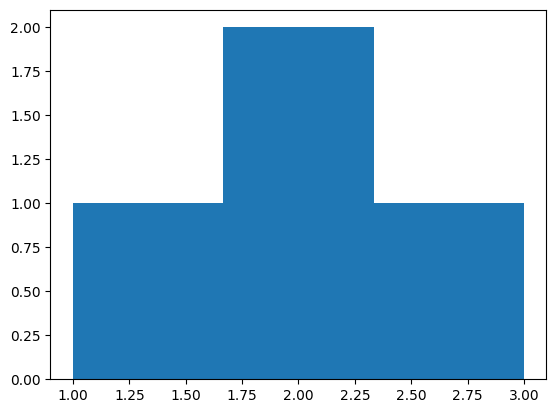

In [31]:
plt.hist(degree_sequence, bins=3)
plt.show()

### Case study of Ythan Estuary

The data consists of edges (out_node, in_node) and is white space delimitated in addition to having a leading whitespace

In [164]:
DG = nx.DiGraph()

with open("./data/ythan_estuary.txt") as file:
    for line in file:
        node_list = line.split(' ')
        node_a = node_list[1].strip()
        node_b = node_list[2].strip()
        DG.add_edge(node_a,node_b)

In [165]:
DG.remove_node('0')

In [166]:
scc = [(len(c),c) for c in sorted(nx.strongly_connected_components(DG), key=len, reverse=True)][0][1]

In [167]:
in_component = []
for n in scc:
    for s in DG.predecessors(n):
        if s in scc: continue
        if not s in in_component:
            in_component.append(s)

In [168]:
out_component = []
for n in scc:
    for s in DG.successors(n):
        if s in scc: continue
        if not s in in_component:
            out_component.append(s)

In [169]:
bowtie=list(scc)+in_component+out_component
DG_bowtie = DG.subgraph(bowtie)

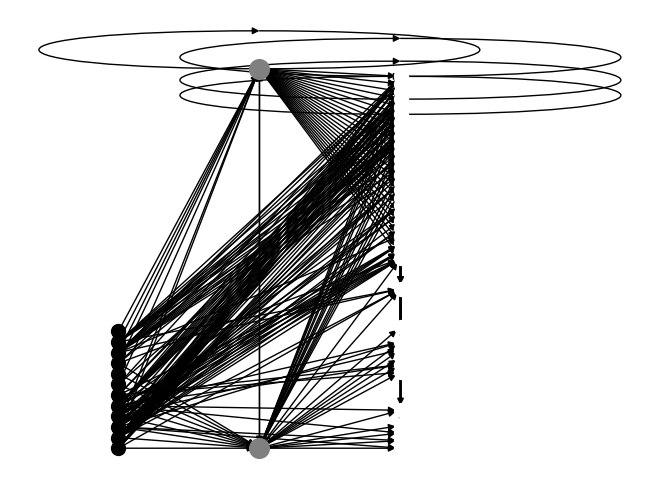

In [170]:
pos={}
in_y=100
pos['89']=(600,in_y)

in_step=700
for in_n in in_component:
    pos[in_n]=(0,in_y)
    in_y=in_y+in_step

out_y=100
out_step=500   
for out_n in out_component:
    pos[out_n]=(1200,out_y)
    out_y=out_y+out_step

pos['90']=(600.,out_y)
    
#plot the bowtie structure
nx.draw(DG_bowtie, pos, node_size=50)
nx.draw_networkx_nodes(DG_bowtie, pos, IN_component, \
                       node_size=100, node_color='Black')
nx.draw_networkx_nodes(DG_bowtie, pos, OUT_component, \
                       node_size=100, node_color='White')
nx.draw_networkx_nodes(DG_bowtie, pos, scc, \
                       node_size=200, node_color='Grey')

### Simple test case for strong connected components

In [110]:
test_adjacency_matrix = [[0,1,0,0,0,0,0,0], \
                         [0,0,1,1,0,0,0,0], \
                         [1,0,0,0,0,0,0,0], \
                         [0,0,0,0,0,0,0,0], \
                         [0,0,0,0,0,1,1,1], \
                         [0,0,0,0,1,0,0,0], \
                         [0,0,0,0,0,0,0,0], \
                         [0,0,0,0,0,0,1,0]
]

In [137]:
test_dg = nx.DiGraph()
for i in range(len(test_adjacency_matrix)):
    test_dg.add_node(i)

In [138]:
for i in range(len(test_adjacency_matrix)):
    for j in range(len(test_adjacency_matrix)):
        if test_adjacency_matrix[i][j]==1:
            test_dg.add_edge(i,j)

#### What nx.strongly_connected_components() does

It returns an `iterable` of `set`s. Each `set` contains the vertices that make up the component. They are not sorted in any general order.

In [145]:
test_scc = nx.strongly_connected_components(test_dg)

In [146]:
for c in test_scc:
    print(c)

{3}
{0, 1, 2}
{6}
{7}
{4, 5}


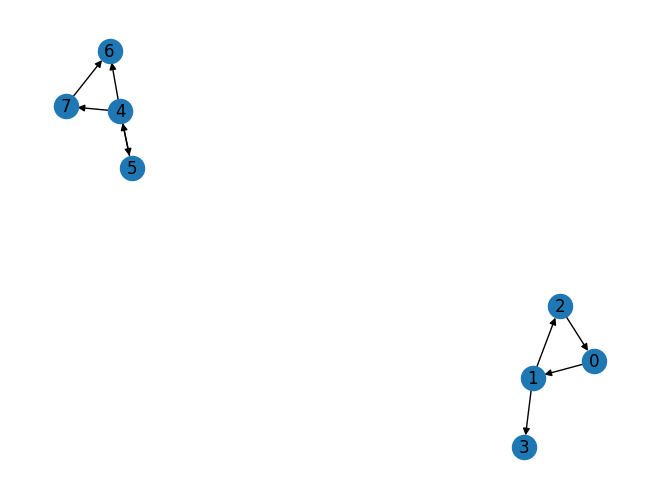

In [151]:
nx.draw(test_dg, with_labels = True)

In [171]:
DG = nx.DiGraph()
with open("./data/little_rock_lake.txt") as file:
    for line in file:
        data = line.split(' ')
        node_a = data[1].strip()
        node_b = data[2].strip()
        DG.add_edge(node_a,node_b)

In [173]:
DG.nodes

NodeView(('0', '11', '61', '80', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '1', '2', '4', '6', '8', '9', '13', '14', '116', '3', '5', '7', '10', '12', '15', '16', '23', '24', '36', '41', '78', '17', '60', '77', '18', '19', '20', '21', '22', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '42', '54', '55', '56', '57', '64', '65', '67', '71', '72', '73', '74', '81', '85', '86', '87', '88', '89', '90', '91', '101', '105', '107', '43', '44', '45', '46', '47', '48', '83', '84', '49', '50', '51', '52', '53', '58', '117', '59', '76', '62', '63', '66', '68', '69', '70', '75', '79',

In [177]:
# Provides all of the out edges
DG.out_edges('11')

OutEdgeDataView([('11', '2'), ('11', '6'), ('11', '8'), ('11', '9'), ('11', '10')])

In [178]:
# Provides all of the inbound edges to a node
DG.in_edges('11')

InEdgeDataView([('0', '11')])

In [251]:
def get_node_key(DG, node):
    out_list = []
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    in_list = []
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    out_list.sort()
    in_list.sort()
    out_list.append('-')
    out_list.extend(in_list)
    return out_list

In [252]:
get_node_key(DG,'11')

['10', '2', '6', '8', '9', '-', '0']

In [260]:
def TrophicNetwork(DG):
    trophic = {}
    for n in DG.nodes():
        k=tuple(get_node_key(DG,n))
        if not k in trophic:
            trophic[k]=[]
        # This is making a list of all the nodes with the same tuples or 
        # in problem terms have the same predators and prey 
        trophic[k].append(n)
        print(trophic)
    for specie in trophic.keys():
        print(specie)
        if len(trophic[specie])>1:
            for n in trophic[specie][1:]:
                print(n)
                             

In [262]:
DG.remove_node('0')
TrophicNetwork(DG)

('10', '2', '6', '8', '9', '-')
{('10', '2', '6', '8', '9', '-'): ['11']}
('2', '76', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['61']}
('1', '122', '3', '5', '6', '76', '8', '9', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['61'], ('1', '122', '3', '5', '6', '76', '8', '9', '-'): ['80']}
('118', '53', '62', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['61'], ('1', '122', '3', '5', '6', '76', '8', '9', '-'): ['80'], ('118', '53', '62', '-'): ['123']}
('118', '53', '62', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['61'], ('1', '122', '3', '5', '6', '76', '8', '9', '-'): ['80'], ('118', '53', '62', '-'): ['123', '124']}
('118', '53', '62', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['61'], ('1', '122', '3', '5', '6', '76', '8', '9', '-'): ['80'], ('118', '53', '62', '-'): ['123', '124', '125']}
('118', '53', '62', '-')
{('10', '2', '6', '8', '9', '-'): ['11'], ('2', '76', '-'): ['

In [257]:
Dictionary1 = {'A': 'Geeks', 'B': 'For', 'C': 'Geeks'}
 
# Dictionary to be checked
print("Dictionary to be checked: ")
print(Dictionary1)
 
# Use of has_key() to check
# for presence of a key in Dictionary
print(Dictionary1.has_key('A'))
print(Dictionary1.has_key('For'))

Dictionary to be checked: 
{'A': 'Geeks', 'B': 'For', 'C': 'Geeks'}


AttributeError: 'dict' object has no attribute 'has_key'